In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import load_workbook


In [23]:
file = "C:/Users/olran/OneDrive/Робочий стіл/Test MS Excel_2023_для аналітика 4 – копія.xlsx"
wb = load_workbook(file)
ws = wb["task1"]
print(len(ws.tables))

4


In [24]:
{key : value for key, value in ws.tables.items()}

{'Таблиця4': 'K20:Q23',
 'Таблиця1': 'A2:I8355',
 'Таблиця3': 'K2:L5',
 'Таблиця5': 'K8:L11'}

In [56]:
mapping = {}

for entry, data_boundary in ws.tables.items():
    data = ws[data_boundary]
    content = [[cell.value for cell in ent] 
               for ent in data ]
    
    header = content[0]
    rest = content[1:]

    df = pd.DataFrame(rest, columns = header)
    mapping[entry] = df
# mapping

In [41]:
Таблиця1, Таблиця4, Таблиця5, Таблиця6 = mapping.values()
task1_df1 = Таблиця4
task1_df2 = Таблиця5
task1_df3 = Таблиця6
task1_df4 = Таблиця1

In [42]:
display(task1_df1.head(),task1_df2.head(), task1_df3.head(), task1_df4.head())

,Дата,Сайт,Країна,Унікальных відвідувачів,Реєстрацій,Конверсія,ID Промокод,Назва промокоду,Статус
0,2019-08-01,SITE_2,Albania (AL),76,5,6.6,22,None,None
1,2019-08-01,SITE_1,Algeria (DZ),213,66,31.0,40,None,None
2,2019-08-01,SITE_3,Angola (AO),45,10,22.2,15,None,None
3,2019-08-01,SITE_2,Argentina (AR),2191,103,4.7,22,None,None
4,2019-08-01,SITE_3,Austria (AT),2467,512,20.8,40,None,None


,ID Промокод,Назва промокоду
0,22,holiday
1,40,party
2,15,weekend


,Конверсія,Статус
0,до 30 %,C
1,31-60%,B
2,61-100%,A


,Сайт,Кількість відвідувачів (holiday),Кількість відвідувачів(party),Кількість відвідувачів(weekend),Кількість реєстрацій(holiday),Кількість реєстрацій(party),Кількість реєстрацій(weekend)
0,SITE_1,None,None,None,None,None,None
1,SITE_2,None,None,None,None,None,None
2,SITE_3,None,None,None,None,None,None


In [43]:
task1_df1.columns

Index(['Дата', 'Сайт', 'Країна', 'Унікальных відвідувачів', 'Реєстрацій',
       'Конверсія', 'ID Промокод', 'Назва промокоду', 'Статус'],
      dtype='object')

In [44]:
conversion = (task1_df1['Реєстрацій']/task1_df1['Унікальных відвідувачів'])*100
conversion.round(1)
task1_df1['Конверсія'] = conversion.round(1)
task1_df1

,Дата,Сайт,Країна,Унікальных відвідувачів,Реєстрацій,Конверсія,ID Промокод,Назва промокоду,Статус
0,2019-08-01,SITE_2,Albania (AL),76,5,6.6,22,None,None
1,2019-08-01,SITE_1,Algeria (DZ),213,66,31.0,40,None,None
2,2019-08-01,SITE_3,Angola (AO),45,10,22.2,15,None,None
3,2019-08-01,SITE_2,Argentina (AR),2191,103,4.7,22,None,None
4,2019-08-01,SITE_3,Austria (AT),2467,512,20.8,40,None,None
...,...,...,...,...,...,...,...,...,...
8348,2019-11-17,SITE_2,United Kingdom (GB),211,62,29.4,22,None,None
8349,2019-11-17,SITE_2,United Kingdom (GB),79,13,16.5,40,None,None
8350,2019-11-17,SITE_3,United States (US),555,25,4.5,22,None,None
8351,2019-11-17,SITE_2,Uzbekistan (UZ),1692,1047,61.9,22,None,None


In [45]:
merge_task1_df = pd.merge(task1_df1, task1_df2, on='ID Промокод', how='left')
merge_task1_df['Назва промокоду_x'] = merge_task1_df['Назва промокоду_y']
merge_task1_df = merge_task1_df.drop('Назва промокоду_y', axis=1)
merge_task1_df = merge_task1_df.rename(columns={'Назва промокоду_x': 'Назва промокоду'})
task1_df1 = merge_task1_df

In [46]:
for index, row in task1_df1.iterrows():
    if row['Конверсія'] < 30:
        task1_df1.at[index, 'Статус'] = 'C'
    elif row['Конверсія'] > 60:
        task1_df1.at[index, 'Статус'] = 'A'
    else:
        task1_df1.at[index, 'Статус'] = 'B'
task1_df1

,Дата,Сайт,Країна,Унікальных відвідувачів,Реєстрацій,Конверсія,ID Промокод,Назва промокоду,Статус
0,2019-08-01,SITE_2,Albania (AL),76,5,6.6,22,holiday,C
1,2019-08-01,SITE_1,Algeria (DZ),213,66,31.0,40,party,B
2,2019-08-01,SITE_3,Angola (AO),45,10,22.2,15,weekend,C
3,2019-08-01,SITE_2,Argentina (AR),2191,103,4.7,22,holiday,C
4,2019-08-01,SITE_3,Austria (AT),2467,512,20.8,40,party,C
...,...,...,...,...,...,...,...,...,...
8348,2019-11-17,SITE_2,United Kingdom (GB),211,62,29.4,22,holiday,C
8349,2019-11-17,SITE_2,United Kingdom (GB),79,13,16.5,40,party,C
8350,2019-11-17,SITE_3,United States (US),555,25,4.5,22,holiday,C
8351,2019-11-17,SITE_2,Uzbekistan (UZ),1692,1047,61.9,22,holiday,A


In [47]:
display(task1_df1['Статус'].value_counts(), task1_df1['Сайт'].value_counts(), task1_df1['Назва промокоду'].value_counts())

C    7244
B    1001
A     108
Name: Статус, dtype: int64

SITE_3    3371
SITE_2    2694
SITE_1    2288
Name: Сайт, dtype: int64

holiday    3365
party      2786
weekend    2202
Name: Назва промокоду, dtype: int64

In [48]:
pivot_task1_df4 = task1_df1.pivot_table(index='Сайт', columns='Назва промокоду', values=['Унікальных відвідувачів', 'Реєстрацій'], aggfunc='sum')
pivot_task1_df4.rename(columns={'Реєстрацій' : 'Кількість реєстрацій',
                               'Унікальных відвідувачів' : 'Кількість відвідувачів'})

Кількість реєстрацій                Кількість відвідувачів  \
Назва промокоду              holiday  party weekend                holiday   
Сайт                                                                         
SITE_1                         85685  46799   15913                 532530   
SITE_2                        130847  62826   23275                 871332   
SITE_3                         99109  61436   15823                 675695   

                                 
Назва промокоду   party weekend  
Сайт                             
SITE_1           284653   94110  
SITE_2           400906  155279  
SITE_3           392191  108071

In [49]:
task1_df4 = pivot_task1_df4
task1_df4

Реєстрацій                Унікальных відвідувачів          \
Назва промокоду    holiday  party weekend                 holiday   party   
Сайт                                                                        
SITE_1               85685  46799   15913                  532530  284653   
SITE_2              130847  62826   23275                  871332  400906   
SITE_3               99109  61436   15823                  675695  392191   

                         
Назва промокоду weekend  
Сайт                     
SITE_1            94110  
SITE_2           155279  
SITE_3           108071

In [50]:
display(task1_df1.head(),task1_df2.head(), task1_df3.head(), task1_df4.head())

,Дата,Сайт,Країна,Унікальных відвідувачів,Реєстрацій,Конверсія,ID Промокод,Назва промокоду,Статус
0,2019-08-01,SITE_2,Albania (AL),76,5,6.6,22,holiday,C
1,2019-08-01,SITE_1,Algeria (DZ),213,66,31.0,40,party,B
2,2019-08-01,SITE_3,Angola (AO),45,10,22.2,15,weekend,C
3,2019-08-01,SITE_2,Argentina (AR),2191,103,4.7,22,holiday,C
4,2019-08-01,SITE_3,Austria (AT),2467,512,20.8,40,party,C


,ID Промокод,Назва промокоду
0,22,holiday
1,40,party
2,15,weekend


,Конверсія,Статус
0,до 30 %,C
1,31-60%,B
2,61-100%,A


Реєстрацій                Унікальных відвідувачів          \
Назва промокоду    holiday  party weekend                 holiday   party   
Сайт                                                                        
SITE_1               85685  46799   15913                  532530  284653   
SITE_2              130847  62826   23275                  871332  400906   
SITE_3               99109  61436   15823                  675695  392191   

                         
Назва промокоду weekend  
Сайт                     
SITE_1            94110  
SITE_2           155279  
SITE_3           108071

In [51]:
most_popular_promos_by_visitors = task1_df4['Унікальных відвідувачів'].idxmax(axis=1)

# Результати міститимуть назви промокодів, які користуються найбільшою популярністю на кожному сайті
print("Найпопулярніші промокоди за кількістю відвідувачів:")
print(most_popular_promos_by_visitors)

Найпопулярніші промокоди за кількістю відвідувачів:
Сайт
SITE_1    holiday
SITE_2    holiday
SITE_3    holiday
dtype: object


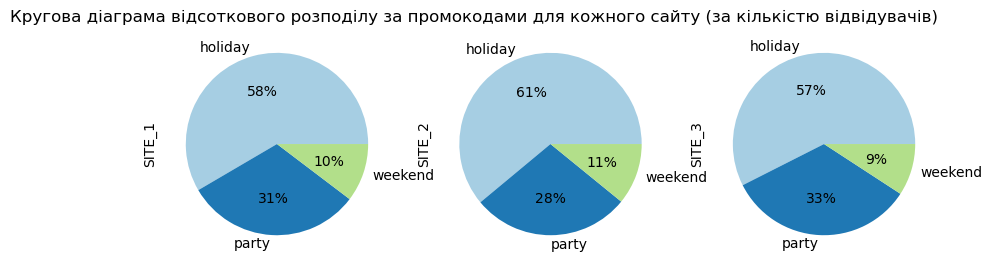

In [52]:
percent_df = task1_df4['Унікальных відвідувачів'].div(task1_df4.sum(axis=1), axis=0) * 100
colors = plt.cm.Paired(range(len(percent_df)))
percent_df.T.plot.pie(subplots=True, legend='', colors=colors, autopct='%1.0f%%', figsize=(10, 8))
plt.title('Кругова діаграма відсоткового розподілу за промокодами для кожного сайту (за кількістю відвідувачів)', loc='right');

In [53]:
filtered_df = task1_df1[task1_df1['Назва промокоду'] == 'holiday']
filtered_df1 = filtered_df.groupby(['Сайт', 'Країна'])['Унікальных відвідувачів'].sum().reset_index()
filtered_df1

,Сайт,Країна,Унікальных відвідувачів
0,SITE_1,Albania (AL),2468
1,SITE_1,Algeria (DZ),464
2,SITE_1,Angola (AO),361
3,SITE_1,Argentina (AR),398
4,SITE_1,Australia (AU),7053
...,...,...,...
300,SITE_3,United States (US),13996
301,SITE_3,Uzbekistan (UZ),22349
302,SITE_3,Venezuela (VE),518
303,SITE_3,Vietnam (VN),1317


In [54]:
filtered_df = task1_df1[task1_df1['Назва промокоду'] == 'holiday']

# Групуємо дані за Сайтом, Країною та промокодом та обчислюємо суму унікальних відвідувачів і реєстрацій
grouped = filtered_df.groupby(['Сайт', 'Країна', 'Назва промокоду'])[['Унікальных відвідувачів', 'Реєстрацій']].sum().reset_index()

# Розраховуємо конверсію за весь період
grouped['Конверсія'] = (grouped['Реєстрацій'] / grouped['Унікальных відвідувачів']) * 100

# Виводимо топ-10 країн для кожного сайту разом з конверсією
top_10_countries_by_site = grouped.groupby('Сайт').apply(lambda x: x.nlargest(10, 'Унікальных відвідувачів')).reset_index(drop=True)
top_10_countries_by_site[['Сайт', 'Країна', 'Унікальных відвідувачів', 'Конверсія']]

,Сайт,Країна,Унікальных відвідувачів,Конверсія
0,SITE_1,Czech Republic (CZ),102653,2.116840
1,SITE_1,Kazakhstan (KZ),55347,17.648653
2,SITE_1,Netherlands (NL),41297,38.513693
3,SITE_1,Finland (FI),34221,3.445253
4,SITE_1,Azerbaijan (AZ),20647,14.505739
5,SITE_1,France (FR),20407,19.307101
6,SITE_1,United Kingdom (GB),18373,30.441409
7,SITE_1,Romania (RO),18204,24.686882
8,SITE_1,Moldova (MD),14933,25.185830
9,SITE_1,Georgia (GE),13672,3.905793


In [55]:
with pd.ExcelWriter(file, engine='openpyxl', mode='a',
                    if_sheet_exists="overlay") as writer:
    task1_df1.to_excel(writer, sheet_name="task1_solution", )
    task1_df2.to_excel(writer, sheet_name="task1_solution", startrow=0 ,startcol=13)
    task1_df3.to_excel(writer, sheet_name="task1_solution", startrow=5 ,startcol=13)
    task1_df4.to_excel(writer, sheet_name="task1_solution", startrow=10 ,startcol=13)  
    